# Exercise 1 - Describe Numeric Data

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

### Generate numeric values and add outliers

In [2]:
n = 100

data = np.random.randint(1, 100, n)

indeces = np.random.randint(0, n, 2)
data[indeces] += 200

data

array([ 20,  61,  32,  47,  95,  70,  23,   2,  97,  94,  39,   1,  69,
        77,  97,  18,   7,  78,   4,  50,  14,  62,  65,  27,  74,  17,
       265,  64,  20,  23,  93,  56,   2,  99,  74,  56,  60,  73,  44,
        32,  88,  78,  32,  55,  80,   3,  77,  55,  97,  61,  98,  79,
        56,  29,  30,  34,  45,  16,  56,  20, 272,  46,  36,  76,  97,
        46,  26,  59,  67,  67,  79,  19,  74,  10,  26,  10,  41,  41,
        22,  29,  99,  56,  44,  90,  50,  59,  29,  86,  49,  44,   2,
        79,  50,  26,   7,  85,  45,  62,  40,  92])

### Define describe function

In [3]:
def mode(data):
    vals, counts = np.unique(data, return_counts=True)
    index = np.argmax(counts)
    return vals[index]

# or

import scipy.stats

def mode(data):
    return scipy.stats.mode(data).mode

In [4]:
def describe(data):
    n = len(data)
    q1, q3 = np.quantile(data, [0.25, 0.75])
    iqr = q3 - q1
    tukey_lower_bound = q1 - 1.5 * iqr
    tukey_upper_bound = q3 + 1.5 * iqr,
    outliers = data[(data < q1 - 1.5 * iqr) | (data > q3 + 1.5 * iqr)]
    return {
        'n': n,
        'minimum': data.min(),
        'maximum': data.max(),
        'mean': data.mean(),
        'median': np.median(data),
        'mode': scipy.stats.mode(data).mode,
        'std': data.std(),
        'q1': q1,
        'q3': q3,
        'iqr': iqr,
        'skewness': scipy.stats.skew(data),
        'kurtosis': scipy.stats.kurtosis(data),
        'tukey_lower_bound': tukey_lower_bound,
        'tukey_upper_bound': tukey_upper_bound,
        'number_of_outliers': len(outliers),
        'outliers': outliers
    }

### Use the function to describe the data

In [97]:
describe(data)

{'n': 100,
 'minimum': 1,
 'maximum': 225,
 'mean': 52.34,
 'median': 44.5,
 'mode': 7,
 'std': 38.29078740376071,
 'q1': 25.75,
 'q3': 77.25,
 'iqr': 51.5,
 'skewness': 1.6728372934448315,
 'kurtosis': 5.701897056831578,
 'tukey_lower_bound': -51.5,
 'tukey_upper_bound': (154.5,),
 'number_of_outliers': 2,
 'outliers': array([225, 223])}

In [98]:
scipy.stats.describe(data)

DescribeResult(nobs=100, minmax=(1, 225), mean=52.34, variance=1480.9943434343431, skewness=1.6728372934448315, kurtosis=5.701897056831578)

### Plot the histogram, the boxplot and the kde plot

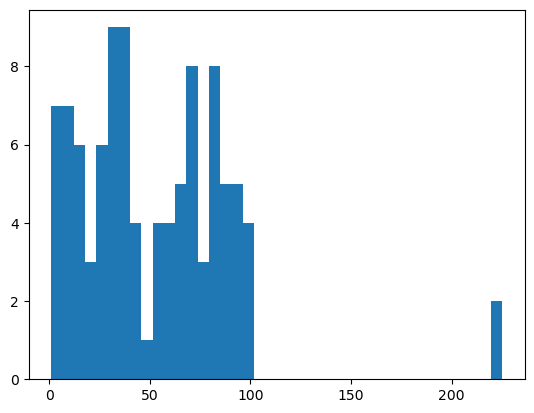

In [100]:
plt.hist(data, bins=40)
plt.show()

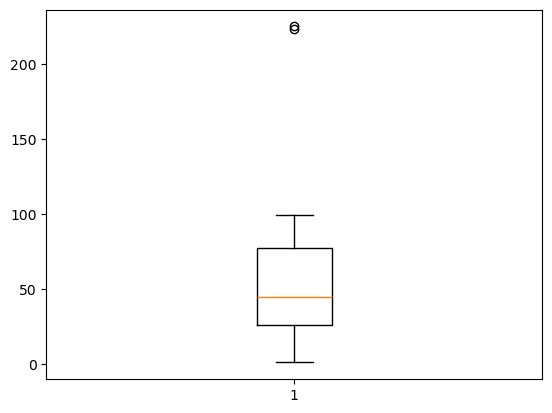

In [101]:
plt.boxplot(data)
plt.show()

<Axes: ylabel='Density'>

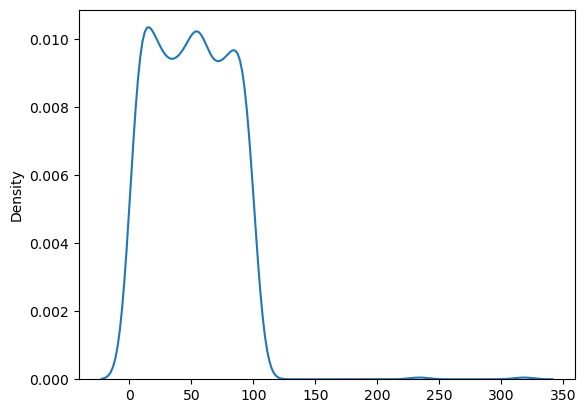

In [12]:
sns.kdeplot(data)

### The diamonds dataset

In [13]:
diamonds = sns.load_dataset("diamonds")
diamond_prices = diamonds["price"]

In [14]:
describe(diamond_prices)

{'n': 53940,
 'minimum': 326,
 'maximum': 18823,
 'mean': 3932.799721913237,
 'median': 2401.0,
 'mode': 605,
 'std': 3989.439738146379,
 'q1': 950.0,
 'q3': 5324.25,
 'iqr': 4374.25,
 'skewness': 1.6183502776053016,
 'kurtosis': 2.177382669056634,
 'tukey_lower_bound': -5611.375,
 'tukey_upper_bound': 11885.625,
 'number_of_outliers': 3540,
 'outliers': 23820    11886
 23821    11886
 23822    11888
 23823    11888
 23824    11888
          ...  
 27745    18803
 27746    18804
 27747    18806
 27748    18818
 27749    18823
 Name: price, Length: 3540, dtype: int64}

In [15]:
scipy.stats.describe(diamond_prices)

DescribeResult(nobs=53940, minmax=(326, 18823), mean=3932.799721913237, variance=15915629.424301451, skewness=1.6183502776053016, kurtosis=2.177382669056634)

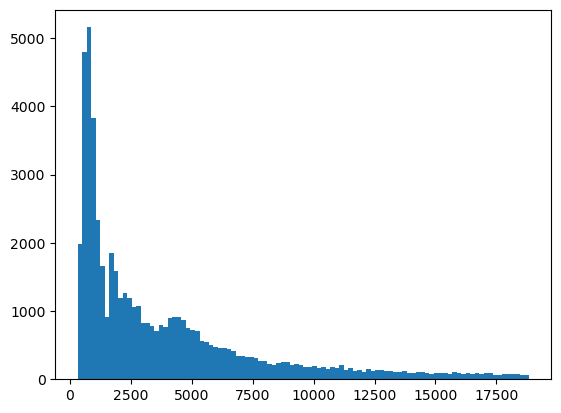

In [22]:
plt.hist(diamond_prices, bins=100)
plt.show()

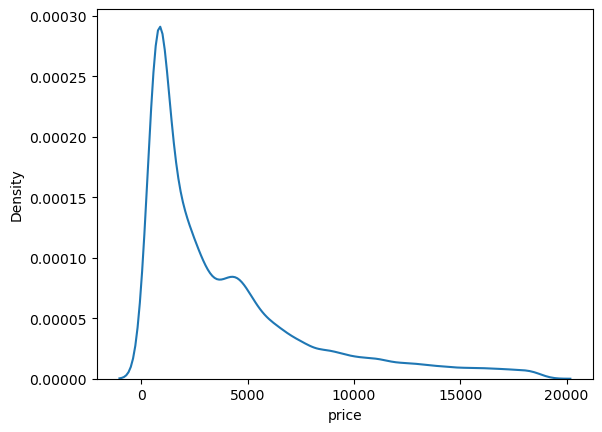

In [17]:
sns.kdeplot(diamond_prices)
plt.show()

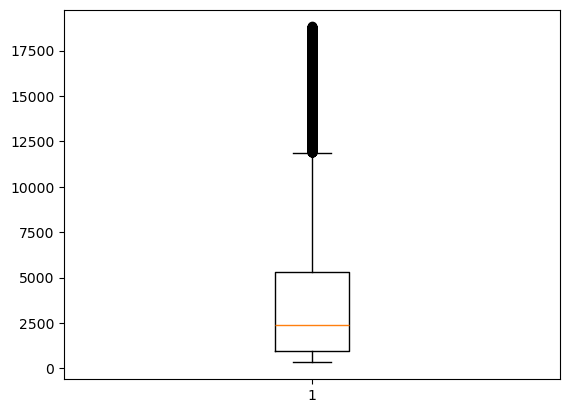

In [18]:
plt.boxplot(diamond_prices)
plt.show()